# Downloading and Prepping Data

In [2]:
import numpy as np #useful for many scientific computing in Python
import pandas as pd  #primary data structure library
from PIL import Image #converting impages into arrays

In [3]:
# read excel file
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
df_can= pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2
                     )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df_can.shape)

(195, 51)


In [10]:
df_can=df_can.iloc[:,:43]

In [11]:
df_can.shape

(195, 43)

In [14]:
#modifikasi unutk mempermudah visualisasi data

# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

# rename column so that they make sense
df_can.rename(columns={
    'OdName':'Country',
    'AreaName':'Continent',
    'RegName':'Region'},
    inplace=True
)

# make labels as string
df_can.columns=list(map(str,df_can.columns))

# set country name as index
df_can.set_index('Country',inplace=True)

# add total column
df_can['Total']=df_can.sum(axis=1)

# years that will be used in plot
years=list(map(str,range(1980,2014)))
print ('data dimensions:',df_can.shape)

data dimensions: (195, 38)


# Visualizing data using matplotlib

In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for waffle charts

mpl.style.use('ggplot') #optional for ggplot style

print('Matplotlib version',mpl.__version__) #check version

Matplotlib version 3.3.4


## 1 waffle charts: progress  pencapaian tujuan

In [18]:
df_dsn=df_can.loc[['Denmark','Norway','Sweden'],:]

In [19]:
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


### step 1: buat proporsi tiap kategori

In [21]:
total_values=sum(df_dsn['Total'])
category_prop=[float(value)/total_values for value in df_dsn['Total']]

#print out proportions
for i,proportion in enumerate(category_prop):
    print(df_dsn.index.values[i]+':'+str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


### step 2: menentukan ukuran keseluruhan waffle chart

In [22]:
width=40 #charts width
height=10 #charts height

total_num_tiles=width*height

### step 3: menentukan jumlah ubin per proporsi

In [23]:
#compute the numberof tiles
tiles_per_category=[round(proportion *total_num_tiles) for proportion in category_prop]

#print out tiles
for i,tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


### Step 4: membuat matriks menyerupai wafel

In [26]:
#initialize empty matrix
waffle_chart=np.zeros((height,width))

category_index=0
tile_index=0

#populate waffle chart
for col in range(width):
    for row in range(height):
        tile_index+=1
        
        #if number of tiles populated = its correponding allocated tiles
        if tile_index>sum(tiles_per_category[0:category_index]):
            #proceed to the next category
            category_index+=1
            
        #set the class value to an integer
        waffle_chart[row,col]=category_index


print('Waffle populated!')

Waffle populated!


### Step 5: visualised waffle

<Figure size 432x288 with 0 Axes>

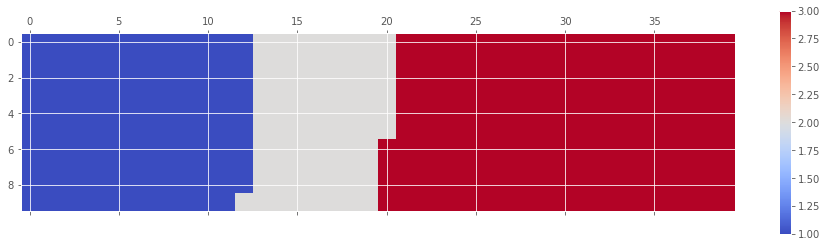

In [27]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

### Step 6: percantik chart

([], [])

<Figure size 432x288 with 0 Axes>

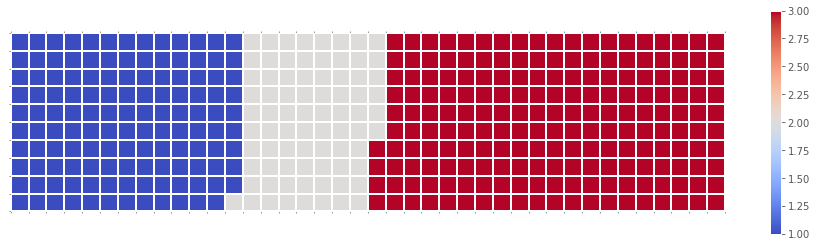

In [32]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

#get the axis
ax=plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)

#add gridlines on minor ticks
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])




<Figure size 432x288 with 0 Axes>

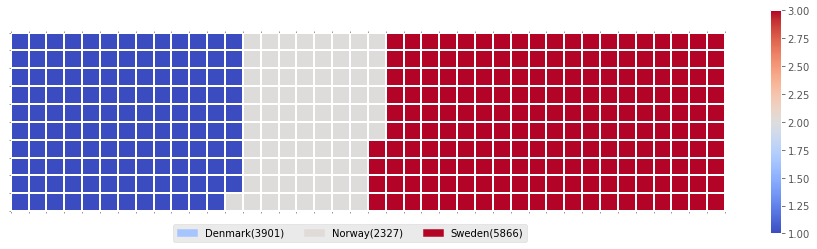

In [36]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

#get the axis
ax=plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)

#add gridlines on minor ticks
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])


values_cumsum=np.cumsum(df_dsn['Total'])
total_values=values_cumsum[len(values_cumsum)-1]

#create legend
legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str=category+'('+str(df_dsn['Total'][i])+')'
    color_val=colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val,label=label_str))

#add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0.,-0.2,0.95,.1)
          )

### Step 8: function  create waffle

In [39]:
def create_waffle_chart(categoris,values, height,width,colormap,value_sign=''):
    total_values=sum(df_dsn['Total'])
    category_prop=[float(value)/total_values for value in df_dsn['Total']]

    #print out proportions
    for i,proportion in enumerate(category_prop):
        print(df_dsn.index.values[i]+':'+str(proportion))
    
    #compute the numberof tiles
    tiles_per_category=[round(proportion *total_num_tiles) for proportion in category_prop]

    #print out tiles
    for i,tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+':'+str(tiles))
    
    #initialize empty matrix
    waffle_chart=np.zeros((height,width))

    category_index=0
    tile_index=0

    #populate waffle chart
    for col in range(width):
        for row in range(height):
            tile_index+=1
        
            #if number of tiles populated = its correponding allocated tiles
            if tile_index>sum(tiles_per_category[0:category_index]):
                #proceed to the next category
                category_index+=1
            
            #set the class value to an integer
            waffle_chart[row,col]=category_index

    fig=plt.figure()

    colormap=plt.cm.coolwarm
    plt.matshow(waffle_chart,cmap=colormap)
    plt.colorbar()

    #get the axis
    ax=plt.gca()

    #set minor ticks
    ax.set_xticks(np.arange(-.5,(width),1),minor=True)
    ax.set_yticks(np.arange(-.5,(height),1),minor=True)

    #add gridlines on minor ticks
    ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

    plt.xticks([])
    plt.yticks([])


    values_cumsum=np.cumsum(df_dsn['Total'])
    total_values=values_cumsum[len(values_cumsum)-1]

    #create legend
    legend_handles=[]
    for i, category in enumerate(df_dsn.index.values):
        label_str=category+'('+str(df_dsn['Total'][i])+')'
        color_val=colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val,label=label_str))

    #add legend to chart
    plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0.,-0.2,0.95,.1)
          )

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744
Denmark:129
Norway:77
Sweden:194


<Figure size 432x288 with 0 Axes>

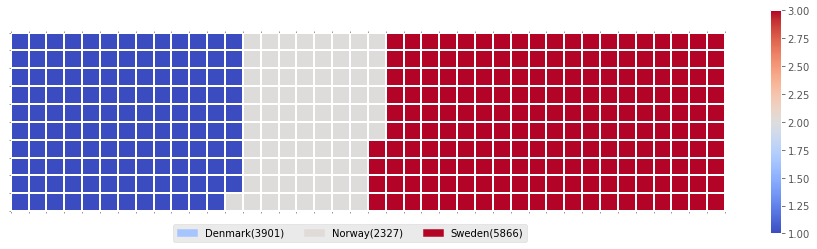

In [40]:
width=40
height=10

categories=df_dsn.index.values
values=df_dsn['Total']
colormap=plt.cm.coolwarm

create_waffle_chart(categories,values,height,width,colormap)


# Word Clouds

In [51]:
#install wordcloud

!pip install wordcloud

#import package

from wordcloud import WordCloud,STOPWORDS
print ('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [64]:
#Download file & save as alice_novel.txt
!wget --quiet
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
    

#open the file
alice_novel=open('alice_novel.txt','r').read()

print('File downloade and saved!')

SyntaxError: invalid syntax (<ipython-input-64-94fb265eb0f6>, line 3)

In [55]:
#open the file
alice_novel=open('alice_novel.txt','r').read()

print('File downloade and saved!')

File downloade and saved!


In [56]:
stopwords=set(STOPWORDS)

In [57]:
#initiate a word cloud object
alice_wc=WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#generate the word cloud
alice_wc.generate(alice_novel)

<function matplotlib.pyplot.show(close=None, block=None)>

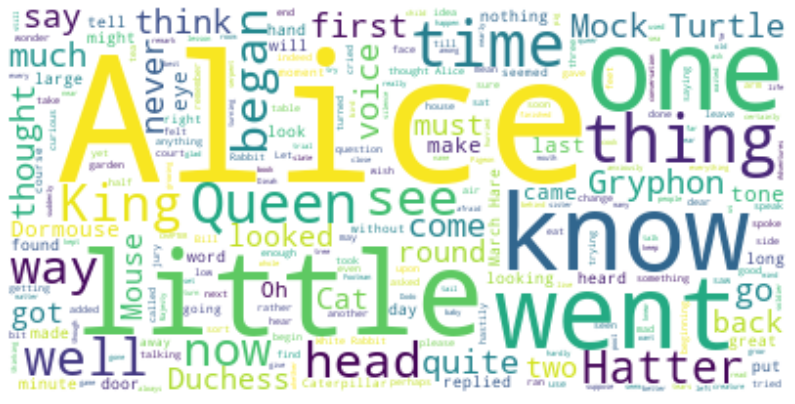

In [60]:
#exclude words which dont hv meaning
stopwords.add('said')

#regenerate
alice_wc.generate(alice_novel)

#set figure
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show

In [65]:
#download image
!wget --quiet
https://github.com/ayurya/H8_066/alice_mask.png -O alice_mask.png
alice_mas=np.array(Image.open('alice_mask.png'))
print('Image downloaded and saved!')

SyntaxError: invalid syntax (<ipython-input-65-f6e45de5b2e4>, line 3)

In [66]:
fig.savefig('Alice_mask.png',dpi=300)